In [1]:
import sys
import os
from os.path import join
sys.path.append(os.path.abspath(".."))
from src.utils.preprocessing import preprocess_pipeline
from os.path import join
from src.data.mnist_loader import MnistDataloader

input_path = "../data"

mnist = MnistDataloader(
    join(input_path, "train-images-idx3-ubyte/train-images-idx3-ubyte"),
    join(input_path, "train-labels-idx1-ubyte/train-labels-idx1-ubyte"),
    join(input_path, "t10k-images-idx3-ubyte/t10k-images-idx3-ubyte"),
    join(input_path, "t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte"),
)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Training data (with augmentation)
x_train_prep, y_train_prep = preprocess_pipeline(
    x_train, y_train, augment=True
)

# Test data (no augmentation)
x_test_prep, y_test_prep = preprocess_pipeline(
    x_test, y_test, augment=False
)

In [2]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert test data to tensors if not already done
x_test_tensor = torch.tensor(x_test_prep, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_prep, dtype=torch.long)

# Create DataLoader
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
from src.models.cnn import MNISTCNN

model = MNISTCNN()
model.load_state_dict(torch.load("models/mnist_cnn.pth"))
model.eval()  # Important: set model to evaluation mode


MNISTCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [4]:
from src.evaluation.evaluation import evaluate_model
from src.models.cnn import MNISTCNN


In [5]:
model = MNISTCNN()
model.load_state_dict(torch.load("models/mnist_cnn.pth"))
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = evaluate_model(model, test_loader, device)

print("Test accuracy:", results["accuracy"])


Test accuracy: 0.9913


In [10]:
print("Test scores:", results["classification_report"])

Test scores: {'0': {'precision': 0.9939024390243902, 'recall': 0.9979591836734694, 'f1-score': 0.9959266802443992, 'support': 980.0}, '1': {'precision': 0.9938380281690141, 'recall': 0.9947136563876652, 'f1-score': 0.9942756494936151, 'support': 1135.0}, '2': {'precision': 0.9884504331087585, 'recall': 0.9951550387596899, 'f1-score': 0.9917914051183003, 'support': 1032.0}, '3': {'precision': 0.9921104536489151, 'recall': 0.996039603960396, 'f1-score': 0.9940711462450593, 'support': 1010.0}, '4': {'precision': 0.9979274611398964, 'recall': 0.9806517311608961, 'f1-score': 0.9892141756548536, 'support': 982.0}, '5': {'precision': 0.9822616407982262, 'recall': 0.9932735426008968, 'f1-score': 0.987736900780379, 'support': 892.0}, '6': {'precision': 0.9927007299270073, 'recall': 0.9937369519832986, 'f1-score': 0.9932185706833594, 'support': 958.0}, '7': {'precision': 0.9950980392156863, 'recall': 0.9873540856031129, 'f1-score': 0.9912109375, 'support': 1028.0}, '8': {'precision': 0.991778006

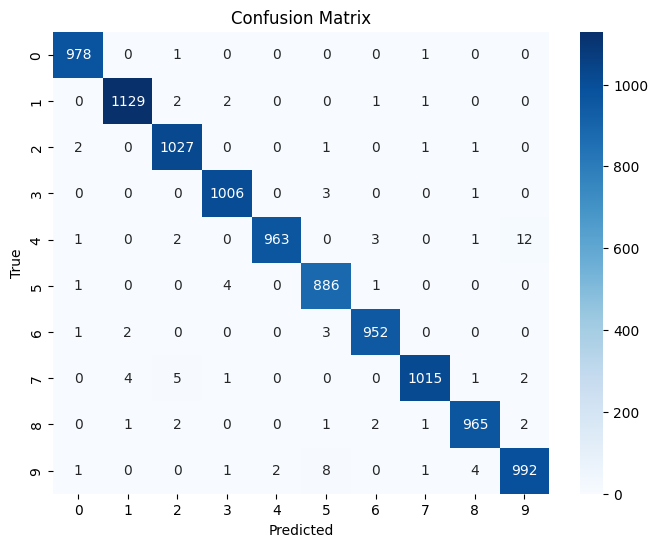

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = results["confusion_matrix"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [7]:
import numpy as np

preds = results["predictions"]
labels = results["labels"]

mis_idx = np.where(preds != labels)[0]


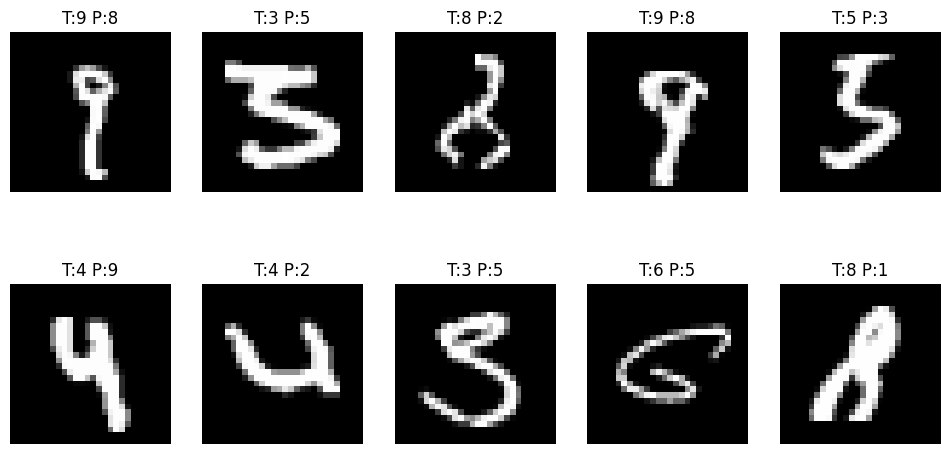

In [8]:
# Visualize misclassified images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(mis_idx[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_prep[idx].squeeze(), cmap="gray")
    plt.title(f"T:{labels[idx]} P:{preds[idx]}")
    plt.axis("off")
plt.show()
